In [1]:
# Import packages
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Image dimensions
im_dim = {"height": 256, "width": 256, "channels": 3}

# Create a classifier class
class Classifier:
    def __init__(self):
        self.model = None

    def predict(self, x):
        return self.model.predict(x)

    def fit(self, x, y, epochs=10, batch_size=32):
        return self.model.fit(x, y, epochs=epochs, batch_size=batch_size)

    def get_accuracy(self, x, y):
        return self.model.evaluate(x, y)

    def load(self, path):
        self.model.load_weights(path)

# Create MesoNet class using Classifier
class Meso(Classifier):
    def __init__(self, learning_rate=0.001):
        super().__init__()
        self.model = self.init_model()
        optimizer = Adam(learning_rate=learning_rate)
        self.model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=['accuracy'])

    def init_model(self):
        x = Input(shape=(im_dim['height'], im_dim['width'], im_dim['channels']))

        x1 = Conv2D(8, (3, 3), padding='same', activation='relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)

        x2 = Conv2D(8, (5, 5), padding='same', activation='relu')(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)

        x3 = Conv2D(16, (5, 5), padding='same', activation='relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)

        x4 = Conv2D(8, (3, 3), padding='same', activation='relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(2, 2), padding='same')(x4)

        flat = Flatten()(x4)
        dense1 = Dense(16, activation='relu')(flat)
        drop = Dropout(0.5)(dense1)
        output = Dense(1, activation='sigmoid')(drop)

        return Model(inputs=x, outputs=output)

# Data Loading Function
def load_data(directory):
    images, labels = [], []
    for label, folder in enumerate(['real', 'fake']):
        folder_path = os.path.join(directory, folder)
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            img = load_img(img_path, target_size=(im_dim['height'], im_dim['width']))
            img_array = img_to_array(img) / 255.0
            images.append(img_array)
            labels.append(label)  # 0 for real, 1 for fake
    return np.array(images), np.array(labels)

# Prediction Function
def predict_image(model, image_path):
    img = load_img(image_path, target_size=(im_dim['height'], im_dim['width']))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    label = "Real" if prediction < 0.5 else "Deepfake"

    plt.imshow(img)
    plt.title(f'Prediction: {label}')
    plt.axis('off')
    plt.show()

# Training the Model
train_images, train_labels = load_data('train_data')
model = Meso()
print("Starting model training...")
model.fit(train_images, train_labels, epochs=10, batch_size=32)
print("Model training complete.")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Starting model training...
Epoch 1/10
626/626 [==============================] - 44s 70ms/sample - loss: 0.7518 - acc: 0.7093
Epoch 2/10
626/626 [==============================] - 51s 82ms/sample - loss: 0.4196 - acc: 0.8195
Epoch 3/10
626/626 [==============================] - 49s 78ms/sample - loss: 0.3201 - acc: 0.8674
Epoch 4/10
626/626 [==============================] - 44s 71ms/sample - loss: 0.2645 - acc: 0.8978
Epoch 5/10
626/626 [==============================] - 40s 65ms/sample - loss: 0.2038 - acc: 0.9105
Epoch 6/10
626/626 [==============================] - 43s 69ms/sample - loss: 0.1459 - acc: 0.9393
Epoch 7/10
626/626 [==============================] - 42s 67ms/sample - loss: 0.1154 - acc: 0.9601
Epoch 8/10
626/626 [==============================] - 38s 61ms/sampl


Testing on Real Image:


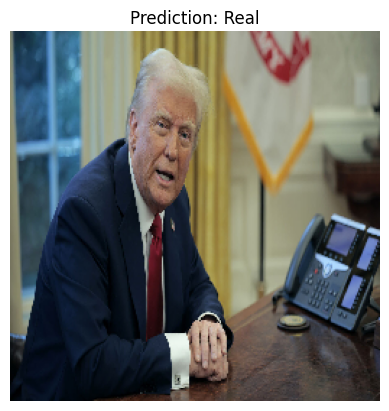

Testing on Fake Image:


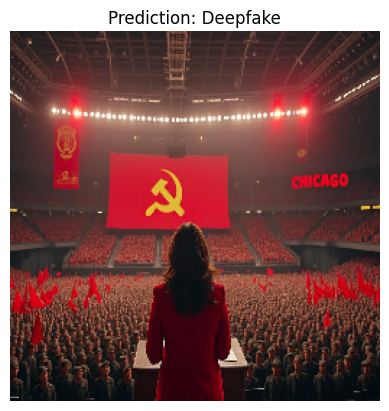

In [3]:
# Testing the Model
print("\nTesting on Real Image:")
predict_image(model.model, 'test_data/real/sample.jpg')

print("Testing on Fake Image:")
predict_image(model.model, 'test_data/fake/sample.jpg')